<a href="https://colab.research.google.com/github/sriwulandari13/LinearRegression_Case/blob/main/1000_Companies%5BStudycase%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [5]:
companies = pd.read_csv('1000_Companies.csv')
#extract data to dependent and independent values
x = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
companies.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.582434,0.978407,0.945245
Administration,0.582434,1.000000,0.520465,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.917270
Profit,0.945245,0.741560,0.917270,1.000000


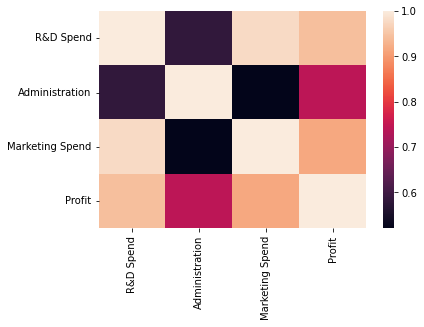

In [7]:
#Data Visualization
#Building the correlation matrix
sns.heatmap(companies.corr())

In [11]:
#Encoding categorical data
#bcs LinearRegression can't process string code
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()
x[:, 3] = labelencoder.fit_transform(x[:, 3])

onehotencoder = OneHotEncoder()
enc_data = onehotencoder.fit_transform(x[:, 3].reshape(-1,1)).toarray()

In [12]:
companies

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [13]:
#avoiding dummy variable trap
x = x[:, 1:]

In [14]:
#Splitting data into train&test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
#Fitting Multiple Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [16]:
#Predict test set result
y_pred = regressor.predict(x_test)
y_pred

array([ 90209.64901318,  88876.28325862,  95200.74973042, 174739.58503941,
        84013.74722284, 110572.81423949, 169438.58451208,  91855.1682484 ,
       163402.29005648,  54991.76617392,  67874.72481309, 150180.9861358 ,
       126512.60670878,  60430.86889281, 175991.46628657,  76097.46542299,
       118577.95366564, 163338.33779446, 165329.70854714, 180487.66382609,
       101238.40282718,  86180.18269683, 179933.75346041,  84689.06190888,
       105088.13051962, 101399.34780971,  40828.42858138,  58070.59626831,
        69777.85472814, 226802.72627013, 121052.52594777, 111658.45981284,
       101689.86321283, 137852.59801618,  64960.45224275, 108854.95146996,
       184345.94907957, 170595.15880734, 173725.92497117, 118014.06326024,
        97038.60706862, 164196.76013804, 107746.47058118,  52030.50278345,
       116882.08703837,  59741.11018494, 157857.27897357,  79750.07622713,
       159139.45816291, 131182.41311202, 183735.81760226, 173691.52102156,
        94077.16471212,  

In [17]:
 #calculating the coefficient
 print(regressor.coef_)

[   1.04239904    0.35510511 -320.45531609]


In [18]:
#calculating the intercept
print(regressor.intercept_)

-88623.76527343772


In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8985038788872521